# Import libraries

In [ ]:
# import libraries
import pickle
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from textblob import TextBlob
import nltk
import random
import sys
import warnings
import spacy
import collections
import scipy.stats as st

nlp = spacy.load('en_core_web_sm')

warnings.filterwarnings("ignore")


In [ ]:
# load preprocessed dataset
pickle_in = open('df.pickle', 'rb')
df = pickle.load(pickle_in)
df.shape



(36343, 10)

## Loading the Text Generated From the GPT-2 Model

In [ ]:
# create a dictionary that will store all GPT-2 corpuses for each celebrity
gpt_text_generation = {}

# load the corpuses and store them for each celebrity
pickle_in = open('Degeneres_text_generation.pickle', 'rb')
Degeneres_text_generation = pickle.load(pickle_in)
gpt_text_generation['Ellen DeGeneres'] = " ".join(Degeneres_text_generation)

pickle_in = open('biden_text_generation.pickle', 'rb')
biden_text_generation = pickle.load(pickle_in)
gpt_text_generation['Joe Biden'] = " ".join(biden_text_generation)


pickle_in = open('brien_text_generation.pickle', 'rb')
brien_text_generation = pickle.load(pickle_in)
gpt_text_generation["Conan O'Brien"] = " ".join(brien_text_generation)


pickle_in = open('carey_text_generation.pickle', 'rb')
carey_text_generation = pickle.load(pickle_in)
gpt_text_generation["Mariah Carey"] = " ".join(carey_text_generation)


pickle_in = open('cena_text_generation.pickle', 'rb')
cena_text_generation = pickle.load(pickle_in)
gpt_text_generation["John Cena"] = " ".join(cena_text_generation)


pickle_in = open('cook_text_generation.pickle', 'rb')
cook_text_generation = pickle.load(pickle_in)
gpt_text_generation["Tim Cook"] = " ".join(cook_text_generation)


pickle_in = open('durant_text_generation.pickle', 'rb')
durant_text_generation = pickle.load(pickle_in)
gpt_text_generation["Kevin Durant"] = " ".join(durant_text_generation)


pickle_in = open('dwayne_text_generation.pickle', 'rb')
dwayne_text_generation = pickle.load(pickle_in)
gpt_text_generation["Dwayne Johnson"] = " ".join(dwayne_text_generation)


pickle_in = open('fallon_text_generation.pickle', 'rb')
fallon_text_generation = pickle.load(pickle_in)
gpt_text_generation["jimmy fallon"] = " ".join(fallon_text_generation)


pickle_in = open('francis_text_generation.pickle', 'rb')
francis_text_generation = pickle.load(pickle_in)
gpt_text_generation["Pope Francis"] = " ".join(francis_text_generation)


pickle_in = open('gaga_text_generation.pickle', 'rb')
gaga_text_generation = pickle.load(pickle_in)
gpt_text_generation["Lady Gaga"] = " ".join(gaga_text_generation)


pickle_in = open('gates_text_generation.pickle', 'rb')
gates_text_generation = pickle.load(pickle_in)
gpt_text_generation["Bill Gates"] = " ".join(gates_text_generation)


pickle_in = open('harris_text_generation.pickle', 'rb')
harris_text_generation = pickle.load(pickle_in)
gpt_text_generation["Neil Patrick Harris"] = " ".join(harris_text_generation)


pickle_in = open('hart_text_generation.pickle', 'rb')
hart_text_generation = pickle.load(pickle_in)
gpt_text_generation["Kevin Hart"] = " ".join(hart_text_generation)


pickle_in = open('james_text_generation.pickle', 'rb')
james_text_generation = pickle.load(pickle_in)
gpt_text_generation["LeBron James"] = " ".join(james_text_generation)


pickle_in = open('jenner_text_generation.pickle', 'rb')
jenner_text_generation = pickle.load(pickle_in)
gpt_text_generation["Kylie Jenner"] = " ".join(jenner_text_generation)


pickle_in = open('joshua_text_generation.pickle', 'rb')
joshua_text_generation = pickle.load(pickle_in)
gpt_text_generation["Anthony Joshua"] = " ".join(joshua_text_generation)


pickle_in = open('keys_text_generation.pickle', 'rb')
keys_text_generation = pickle.load(pickle_in)
gpt_text_generation["Alicia Keys"] = " ".join(keys_text_generation)


pickle_in = open('khalifa_text_generation.pickle', 'rb')
khalifa_text_generation = pickle.load(pickle_in)
gpt_text_generation["Wiz Khalifa"] = " ".join(khalifa_text_generation)


pickle_in = open('musk_text_generation.pickle', 'rb')
musk_text_generation = pickle.load(pickle_in)
gpt_text_generation["Elon Musk"] = " ".join(musk_text_generation)


pickle_in = open('obama_text_generation.pickle', 'rb')
obama_text_generation = pickle.load(pickle_in)
gpt_text_generation["Barack Obama"] = " ".join(obama_text_generation)


pickle_in = open('ramsay_text_generation.pickle', 'rb')
ramsay_text_generation = pickle.load(pickle_in)
gpt_text_generation["Gordon Ramsay"] = " ".join(ramsay_text_generation)


pickle_in = open('rousey_text_generation.pickle', 'rb')
rousey_text_generation = pickle.load(pickle_in)
gpt_text_generation["Ronda Rousey"] = " ".join(rousey_text_generation)


pickle_in = open('styles_text_generation.pickle', 'rb')
styles_text_generation = pickle.load(pickle_in)
gpt_text_generation["Harry Styles."] = " ".join(styles_text_generation)


pickle_in = open('tomlinson_text_generation.pickle', 'rb')
tomlinson_text_generation = pickle.load(pickle_in)
gpt_text_generation["Louis Tomlinson"] = " ".join(tomlinson_text_generation)


pickle_in = open('trump_text_generation.pickle', 'rb')
trump_text_generation = pickle.load(pickle_in)
gpt_text_generation["Donald Trump"] = " ".join(trump_text_generation)


pickle_in = open('warren_text_generation.pickle', 'rb')
warren_text_generation = pickle.load(pickle_in)
gpt_text_generation["Elizabeth Warren"] = " ".join(warren_text_generation)


pickle_in = open('watson_text_generation.pickle', 'rb')
watson_text_generation = pickle.load(pickle_in)
gpt_text_generation["Emma Watson"] = " ".join(watson_text_generation)

pickle_in = open('weiner_text_generation.pickle', 'rb')
weiner_text_generation = pickle.load(pickle_in)
gpt_text_generation["Jeff Weiner"] = " ".join(weiner_text_generation)


pickle_in = open('winfrey_text_generation.pickle', 'rb')
winfrey_text_generation = pickle.load(pickle_in)
gpt_text_generation["Oprah Winfrey"] = " ".join(winfrey_text_generation)




## Loading the Text Generated From the Baseline LSTM Model

In [ ]:
# create a dictionary that will store all baseline LSTM corpuses for each celebrity

baseline_text_generation = {}

pickle_in = open('degeneres_text_generation_baseline.pickle', 'rb')
Degeneres_text_generation = pickle.load(pickle_in)
baseline_text_generation['Ellen DeGeneres'] = " ".join(Degeneres_text_generation)

pickle_in = open('biden_text_generation_baseline.pickle', 'rb')
biden_text_generation = pickle.load(pickle_in)
baseline_text_generation['Joe Biden'] = " ".join(biden_text_generation)


pickle_in = open("O'Brien_text_generation_baseline.pickle", 'rb')
brien_text_generation = pickle.load(pickle_in)
baseline_text_generation["Conan O'Brien"] = " ".join(brien_text_generation)


pickle_in = open('carey_text_generation_baseline.pickle', 'rb')
carey_text_generation = pickle.load(pickle_in)
baseline_text_generation["Mariah Carey"] = " ".join(carey_text_generation)


pickle_in = open('cena_text_generation_baseline.pickle', 'rb')
cena_text_generation = pickle.load(pickle_in)
baseline_text_generation["John Cena"] = " ".join(cena_text_generation)


pickle_in = open('cook_text_generation_baseline.pickle', 'rb')
cook_text_generation = pickle.load(pickle_in)
baseline_text_generation["Tim Cook"] = " ".join(cook_text_generation)


pickle_in = open('durant_text_generation_baseline.pickle', 'rb')
durant_text_generation = pickle.load(pickle_in)
baseline_text_generation["Kevin Durant"] = " ".join(durant_text_generation)


pickle_in = open('johnson_text_generation_baseline.pickle', 'rb')
dwayne_text_generation = pickle.load(pickle_in)
baseline_text_generation["Dwayne Johnson"] = " ".join(dwayne_text_generation)


pickle_in = open('fallon_text_generation_baseline.pickle', 'rb')
fallon_text_generation = pickle.load(pickle_in)
baseline_text_generation["jimmy fallon"] = " ".join(fallon_text_generation)


pickle_in = open('francis_text_generation_baseline.pickle', 'rb')
francis_text_generation = pickle.load(pickle_in)
baseline_text_generation["Pope Francis"] = " ".join(francis_text_generation)


pickle_in = open('gaga_text_generation_baseline.pickle', 'rb')
gaga_text_generation = pickle.load(pickle_in)
baseline_text_generation["Lady Gaga"] = " ".join(gaga_text_generation)


pickle_in = open('gates_text_generation_baseline.pickle', 'rb')
gates_text_generation = pickle.load(pickle_in)
baseline_text_generation["Bill Gates"] = " ".join(gates_text_generation)


pickle_in = open('harris_text_generation_baseline.pickle', 'rb')
harris_text_generation = pickle.load(pickle_in)
baseline_text_generation["Neil Patrick Harris"] = " ".join(harris_text_generation)


pickle_in = open('hart_text_generation_baseline.pickle', 'rb')
hart_text_generation = pickle.load(pickle_in)
baseline_text_generation["Kevin Hart"] = " ".join(hart_text_generation)


pickle_in = open('james_text_generation_baseline.pickle', 'rb')
james_text_generation = pickle.load(pickle_in)
baseline_text_generation["LeBron James"] = " ".join(james_text_generation)


pickle_in = open('jenner_text_generation_baseline.pickle', 'rb')
jenner_text_generation = pickle.load(pickle_in)
baseline_text_generation["Kylie Jenner"] = " ".join(jenner_text_generation)


pickle_in = open('joshua_text_generation_baseline.pickle', 'rb')
joshua_text_generation = pickle.load(pickle_in)
baseline_text_generation["Anthony Joshua"] = " ".join(joshua_text_generation)


pickle_in = open('keys_text_generation_baseline.pickle', 'rb')
keys_text_generation = pickle.load(pickle_in)
baseline_text_generation["Alicia Keys"] = " ".join(keys_text_generation)


pickle_in = open('khalifa_text_generation_baseline.pickle', 'rb')
khalifa_text_generation = pickle.load(pickle_in)
baseline_text_generation["Wiz Khalifa"] = " ".join(khalifa_text_generation)


pickle_in = open('musk_text_generation_baseline.pickle', 'rb')
musk_text_generation = pickle.load(pickle_in)
baseline_text_generation["Elon Musk"] = " ".join(musk_text_generation)


pickle_in = open('obama_text_generation_baseline.pickle', 'rb')
obama_text_generation = pickle.load(pickle_in)
baseline_text_generation["Barack Obama"] = " ".join(obama_text_generation)


pickle_in = open('ramsay_text_generation_baseline.pickle', 'rb')
ramsay_text_generation = pickle.load(pickle_in)
baseline_text_generation["Gordon Ramsay"] = " ".join(ramsay_text_generation)


pickle_in = open('rousey_text_generation_baseline.pickle', 'rb')
rousey_text_generation = pickle.load(pickle_in)
baseline_text_generation["Ronda Rousey"] = " ".join(rousey_text_generation)


pickle_in = open('styles_text_generation_baseline.pickle', 'rb')
styles_text_generation = pickle.load(pickle_in)
baseline_text_generation["Harry Styles."] = " ".join(styles_text_generation)


pickle_in = open('tomlinson_text_generation_baseline.pickle', 'rb')
tomlinson_text_generation = pickle.load(pickle_in)
baseline_text_generation["Louis Tomlinson"] = " ".join(tomlinson_text_generation)


pickle_in = open('trump_text_generation_baseline.pickle', 'rb')
trump_text_generation = pickle.load(pickle_in)
baseline_text_generation["Donald Trump"] = " ".join(trump_text_generation)


pickle_in = open('warren_text_generation_baseline.pickle', 'rb')
warren_text_generation = pickle.load(pickle_in)
baseline_text_generation["Elizabeth Warren"] = " ".join(warren_text_generation)


pickle_in = open('watson_text_generation_baseline.pickle', 'rb')
watson_text_generation = pickle.load(pickle_in)
baseline_text_generation["Emma Watson"] = " ".join(watson_text_generation)

pickle_in = open('weiner_text_generation_baseline.pickle', 'rb')
weiner_text_generation = pickle.load(pickle_in)
baseline_text_generation["Jeff Weiner"] = " ".join(weiner_text_generation)


pickle_in = open('winfrey_text_generation_baseline.pickle', 'rb')
winfrey_text_generation = pickle.load(pickle_in)
baseline_text_generation["Oprah Winfrey"] = " ".join(winfrey_text_generation)

pickle_in = open('tosh_text_generation_baseline.pickle', 'rb')
tosh_text_generation = pickle.load(pickle_in)
baseline_text_generation["daniel tosh"] = " ".join(tosh_text_generation)




## Loading the Text Generated From the Modified LSTM Model

In [ ]:
# create a dictionary that will store all Modified LSTM corpuses for each celebrity

modified_text_generation = {}

pickle_in = open('degeneres_text_generation_modified.pickle', 'rb')
Degeneres_text_generation = pickle.load(pickle_in)
modified_text_generation['Ellen DeGeneres'] = " ".join(Degeneres_text_generation)

pickle_in = open('biden_text_generation_modified.pickle', 'rb')
biden_text_generation = pickle.load(pickle_in)
modified_text_generation['Joe Biden'] = " ".join(biden_text_generation)


pickle_in = open("brien_text_generation_modified.pickle", 'rb')
brien_text_generation = pickle.load(pickle_in)
modified_text_generation["Conan O'Brien"] = " ".join(brien_text_generation)


pickle_in = open('carey_text_generation_modified.pickle', 'rb')
carey_text_generation = pickle.load(pickle_in)
modified_text_generation["Mariah Carey"] = " ".join(carey_text_generation)


pickle_in = open('cena_text_generation_modified.pickle', 'rb')
cena_text_generation = pickle.load(pickle_in)
modified_text_generation["John Cena"] = " ".join(cena_text_generation)


pickle_in = open('cook_text_generation_modified.pickle', 'rb')
cook_text_generation = pickle.load(pickle_in)
modified_text_generation["Tim Cook"] = " ".join(cook_text_generation)


pickle_in = open('durant_text_generation_modified.pickle', 'rb')
durant_text_generation = pickle.load(pickle_in)
modified_text_generation["Kevin Durant"] = " ".join(durant_text_generation)


pickle_in = open('johnson_text_generation_modified.pickle', 'rb')
dwayne_text_generation = pickle.load(pickle_in)
modified_text_generation["Dwayne Johnson"] = " ".join(dwayne_text_generation)


pickle_in = open('fallon_text_generation_modified.pickle', 'rb')
fallon_text_generation = pickle.load(pickle_in)
modified_text_generation["jimmy fallon"] = " ".join(fallon_text_generation)


pickle_in = open('francis_text_generation_modified.pickle', 'rb')
francis_text_generation = pickle.load(pickle_in)
modified_text_generation["Pope Francis"] = " ".join(francis_text_generation)


pickle_in = open('gaga_text_generation_modified.pickle', 'rb')
gaga_text_generation = pickle.load(pickle_in)
modified_text_generation["Lady Gaga"] = " ".join(gaga_text_generation)


pickle_in = open('gates_text_generation_modified.pickle', 'rb')
gates_text_generation = pickle.load(pickle_in)
modified_text_generation["Bill Gates"] = " ".join(gates_text_generation)


pickle_in = open('harris_text_generation_modified.pickle', 'rb')
harris_text_generation = pickle.load(pickle_in)
modified_text_generation["Neil Patrick Harris"] = " ".join(harris_text_generation)


pickle_in = open('hart_text_generation_modified.pickle', 'rb')
hart_text_generation = pickle.load(pickle_in)
modified_text_generation["Kevin Hart"] = " ".join(hart_text_generation)


pickle_in = open('james_text_generation_modified.pickle', 'rb')
james_text_generation = pickle.load(pickle_in)
modified_text_generation["LeBron James"] = " ".join(james_text_generation)


pickle_in = open('jenner_text_generation_modified.pickle', 'rb')
jenner_text_generation = pickle.load(pickle_in)
modified_text_generation["Kylie Jenner"] = " ".join(jenner_text_generation)


pickle_in = open('joshua_text_generation_modified.pickle', 'rb')
joshua_text_generation = pickle.load(pickle_in)
modified_text_generation["Anthony Joshua"] = " ".join(joshua_text_generation)


pickle_in = open('keys_text_generation_modified.pickle', 'rb')
keys_text_generation = pickle.load(pickle_in)
modified_text_generation["Alicia Keys"] = " ".join(keys_text_generation)


pickle_in = open('khalifa_text_generation_modified.pickle', 'rb')
khalifa_text_generation = pickle.load(pickle_in)
modified_text_generation["Wiz Khalifa"] = " ".join(khalifa_text_generation)


pickle_in = open('musk_text_generation_modified.pickle', 'rb')
musk_text_generation = pickle.load(pickle_in)
modified_text_generation["Elon Musk"] = " ".join(musk_text_generation)


pickle_in = open('obama_text_generation_modified.pickle', 'rb')
obama_text_generation = pickle.load(pickle_in)
modified_text_generation["Barack Obama"] = " ".join(obama_text_generation)


pickle_in = open('ramsay_text_generation_modified.pickle', 'rb')
ramsay_text_generation = pickle.load(pickle_in)
modified_text_generation["Gordon Ramsay"] = " ".join(ramsay_text_generation)


pickle_in = open('rousey_text_generation_modified.pickle', 'rb')
rousey_text_generation = pickle.load(pickle_in)
modified_text_generation["Ronda Rousey"] = " ".join(rousey_text_generation)


pickle_in = open('styles_text_generation_modified.pickle', 'rb')
styles_text_generation = pickle.load(pickle_in)
modified_text_generation["Harry Styles."] = " ".join(styles_text_generation)


pickle_in = open('tomlinson_text_generation_modified.pickle', 'rb')
tomlinson_text_generation = pickle.load(pickle_in)
modified_text_generation["Louis Tomlinson"] = " ".join(tomlinson_text_generation)


pickle_in = open('trump_text_generation_modified.pickle', 'rb')
trump_text_generation = pickle.load(pickle_in)
modified_text_generation["Donald Trump"] = " ".join(trump_text_generation)


pickle_in = open('warren_text_generation_modified.pickle', 'rb')
warren_text_generation = pickle.load(pickle_in)
modified_text_generation["Elizabeth Warren"] = " ".join(warren_text_generation)


pickle_in = open('watson_text_generation_modified.pickle', 'rb')
watson_text_generation = pickle.load(pickle_in)
modified_text_generation["Emma Watson"] = " ".join(watson_text_generation)

pickle_in = open('weiner_text_generation_modified.pickle', 'rb')
weiner_text_generation = pickle.load(pickle_in)
modified_text_generation["Jeff Weiner"] = " ".join(weiner_text_generation)


pickle_in = open('winfrey_text_generation_modified.pickle', 'rb')
winfrey_text_generation = pickle.load(pickle_in)
modified_text_generation["Oprah Winfrey"] = " ".join(winfrey_text_generation)


## Exploratory Data Analysis

In [ ]:
# preview of dataset
df.head()

Username  ... Word Count
0  Alicia Keys  ...         40
1  Alicia Keys  ...         54
3  Alicia Keys  ...         52
4  Alicia Keys  ...         33
5  Alicia Keys  ...         21

[5 rows x 10 columns]

In [ ]:
# obtaining the number of tweets for each Twitter account
dict_observations= dict(df['Username'].value_counts())

dict_total_tweets = {
    'Alicia Keys': 9631,
 'Anthony Joshua': 10400,
 'Barack Obama': 16100,
 'Bill Gates': 3522,
 "Conan O'Brien": 4720,
 'Donald Trump': 59558,
 'Dwayne Johnson': 25100,
 'Elizabeth Warren': 7817,
 'Ellen DeGeneres': 22600,
 'Elon Musk': 13900,
 'Emma Watson': 1859,
 'Gordon Ramsay': 23400,
 'Harry Styles.': 5571,
 'Jeff Weiner': 4249,
 'Joe Biden': 7283,
 'John Cena': 6691,
 'Kevin Durant': 24200,
 'Kevin Hart': 40100,
 'Kylie Jenner': 14100,
 'Lady Gaga': 9449,
 'LeBron James':7656,
 'Louis Tomlinson': 7443,
 'Mariah Carey':10100,
 'Neil Patrick Harris':3139,
 'Oprah Winfrey':13100,
 'Pope Francis': 3178,
 'Ronda Rousey': 14500,
 'Tim Cook': 1164,
 'Wiz Khalifa': 48400,
 'daniel tosh': 21,
 'jimmy fallon': 13400
    
}


# create function that returns the number of tweets available from each Twitter account
def num_observations(name):
  return dict_observations[name]

# create a function that returns the total number of tweets from each Twitter account
def total_num_tweets(name):
  return dict_total_tweets[name]

## Examining Word Choice 

In [ ]:
# turn the list of strings into 1 text corpus
def corpus(df):
  corpus = ""
  for text in df:
    corpus+=text
  return corpus



### Alicia Keys 

In [ ]:
# obtain the text corpus of Alicia Keys
df_keys = df[df['Username']=='Alicia Keys']
corpus_keys = corpus(df_keys['Text (EPA)'])


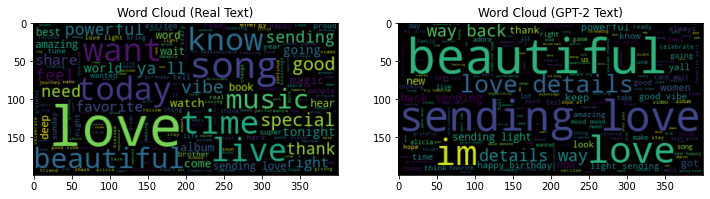

In [ ]:
# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_keys_gpt = WordCloud().generate(gpt_text_generation['Alicia Keys'])
wordcloud_keys_real = WordCloud().generate(corpus_keys)

ax.imshow(wordcloud_keys_real, interpolation='bilinear')
ax2.imshow(wordcloud_keys_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Anthony Joshua

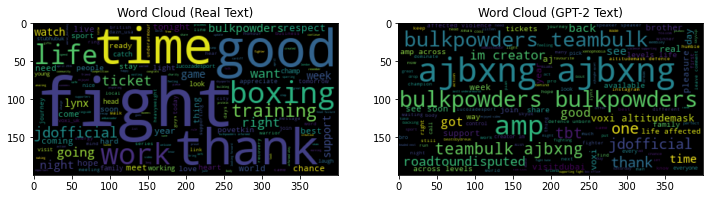

In [ ]:
# obtain the text corpus of Anthony Joshua

df_joshua = df[df['Username']=='Anthony Joshua']
corpus_joshua = corpus(df_joshua['Text (EPA)'])

# plot the word clouds of the original and generated text

plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_joshua_gpt = WordCloud().generate(gpt_text_generation['Anthony Joshua'])
wordcloud_joshua_real = WordCloud().generate(corpus_joshua)

ax.imshow(wordcloud_joshua_real, interpolation='bilinear')
ax2.imshow(wordcloud_joshua_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Barack Obama

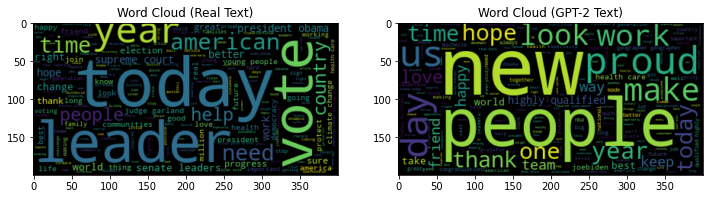

In [ ]:
# obtain the text corpus of Barack Obama

df_obama = df[df['Username']=='Barack Obama']
corpus_obama = corpus(df_obama['Text (EPA)'])

# plot the word clouds of the original and generated text

plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_obama_gpt = WordCloud().generate(gpt_text_generation['Barack Obama'])
wordcloud_obama_real = WordCloud().generate(corpus_obama)

ax.imshow(wordcloud_obama_real, interpolation='bilinear')
ax2.imshow(wordcloud_obama_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Bill Gates

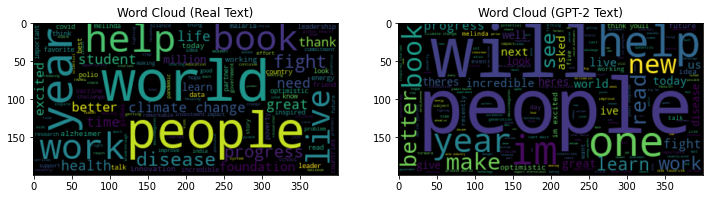

In [ ]:
# obtain the text corpus of Bill Gates
df_gates = df[df['Username']=='Bill Gates']
corpus_gates = corpus(df_gates['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_gates_gpt = WordCloud().generate(gpt_text_generation['Bill Gates'])
wordcloud_gates_real = WordCloud().generate(corpus_gates)

ax.imshow(wordcloud_gates_real, interpolation='bilinear')
ax2.imshow(wordcloud_gates_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Conan O'Brien

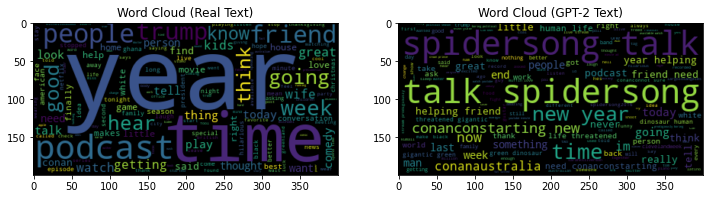

In [ ]:
# obtain the text corpus of Conan O'Brien

df_brien = df[df['Username']=="Conan O'Brien"]
corpus_brien = corpus(df_brien['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_brien_gpt = WordCloud().generate(gpt_text_generation["Conan O'Brien"])
wordcloud_brien_real = WordCloud().generate(corpus_brien)

ax.imshow(wordcloud_brien_real, interpolation='bilinear')
ax2.imshow(wordcloud_brien_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Dwayne Johnson

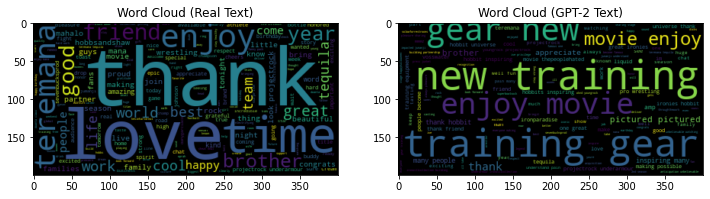

In [ ]:
# obtain the text corpus of Dwayne Johnson

df_johnson= df[df['Username']=="Dwayne Johnson"]
corpus_johnson = corpus(df_johnson['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_johnson_gpt = WordCloud().generate(gpt_text_generation["Dwayne Johnson"])
wordcloud_johnson_real = WordCloud().generate(corpus_johnson)

ax.imshow(wordcloud_johnson_real, interpolation='bilinear')
ax2.imshow(wordcloud_johnson_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Elizabeth Warren

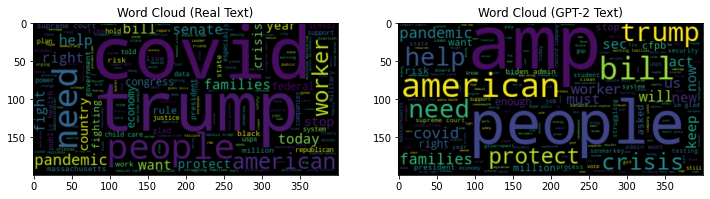

In [ ]:
# obtain the text corpus of Elizabeth Warren

df_warren= df[df['Username']=="Elizabeth Warren"]
corpus_warren = corpus(df_warren['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_warren_gpt = WordCloud().generate(gpt_text_generation["Elizabeth Warren"])
wordcloud_warren_real = WordCloud().generate(corpus_warren)

ax.imshow(wordcloud_warren_real, interpolation='bilinear')
ax2.imshow(wordcloud_warren_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Ellen DeGeneres

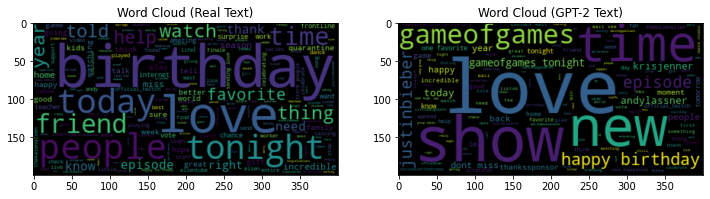

In [ ]:
# obtain the text corpus of Ellen DeGeneres

df_degeneres= df[df['Username']=="Ellen DeGeneres"]
corpus_degeneres = corpus(df_degeneres['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_degeneres_gpt = WordCloud().generate(gpt_text_generation["Ellen DeGeneres"])
wordcloud_degeneres_real = WordCloud().generate(corpus_degeneres)

ax.imshow(wordcloud_degeneres_real, interpolation='bilinear')
ax2.imshow(wordcloud_degeneres_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Elon Musk

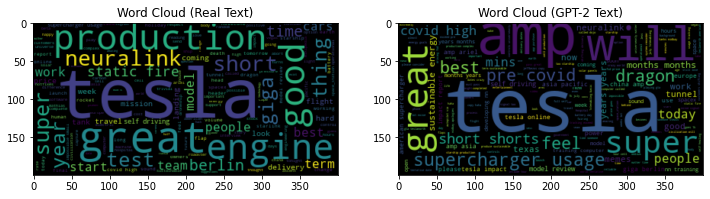

In [ ]:
# obtain the text corpus of Elon Musk

df_musk= df[df['Username']=="Elon Musk"]
corpus_musk = corpus(df_musk['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_musk_gpt = WordCloud().generate(gpt_text_generation["Elon Musk"])
wordcloud_musk_real = WordCloud().generate(corpus_musk)

ax.imshow(wordcloud_musk_real, interpolation='bilinear')
ax2.imshow(wordcloud_musk_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Emma Watson

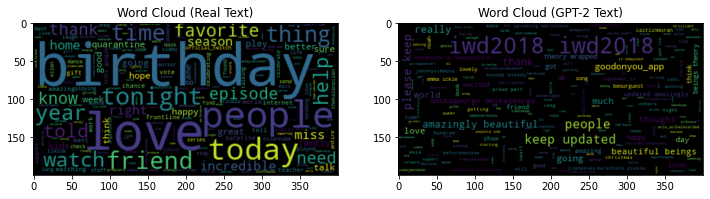

In [ ]:
# obtain the text corpus of Emma Watson

df_watson= df[df['Username']=="Emma Watson"]
corpus_watson = corpus(df_watson['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_watson_gpt = WordCloud().generate(gpt_text_generation["Emma Watson"])
wordcloud_watson_real = WordCloud().generate(corpus_degeneres)

ax.imshow(wordcloud_watson_real, interpolation='bilinear')
ax2.imshow(wordcloud_watson_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Gordon Ramsay

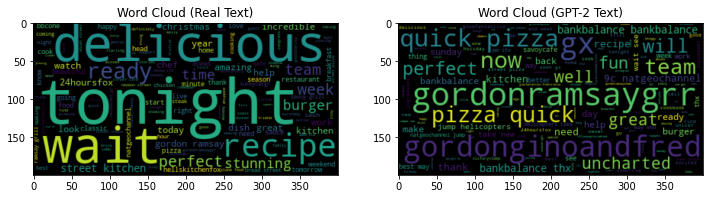

In [ ]:
# obtain the text corpus of Gordon Ramsay

df_ramsay= df[df['Username']=="Gordon Ramsay"]
corpus_ramsay = corpus(df_ramsay['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_ramsay_gpt = WordCloud().generate(gpt_text_generation["Gordon Ramsay"])
wordcloud_ramsay_real = WordCloud().generate(corpus_ramsay)

ax.imshow(wordcloud_ramsay_real, interpolation='bilinear')
ax2.imshow(wordcloud_ramsay_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Jeff Weiner

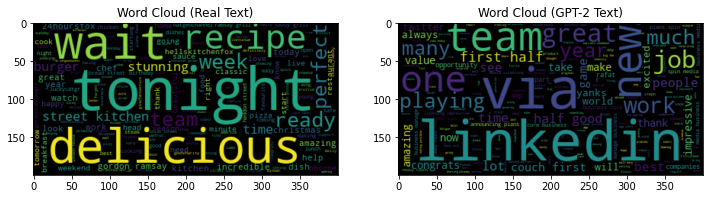

In [ ]:
# obtain the text corpus of Jeff Weiner

df_weiner= df[df['Username']=="Jeff Weiner"]
corpus_weiner = corpus(df_weiner['Text (EPA)'])

# plot the word clouds of the original and generated text

plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_weiner_gpt = WordCloud().generate(gpt_text_generation["Jeff Weiner"])
wordcloud_weiner_real = WordCloud().generate(corpus_ramsay)

ax.imshow(wordcloud_weiner_real, interpolation='bilinear')
ax2.imshow(wordcloud_weiner_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Joe Biden

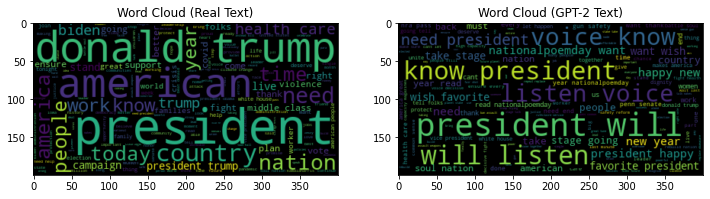

In [ ]:
# obtain the text corpus of Joe Biden

df_biden= df[df['Username']=="Joe Biden"]
corpus_biden = corpus(df_biden['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_biden_gpt = WordCloud().generate(gpt_text_generation["Joe Biden"])
wordcloud_biden_real = WordCloud().generate(corpus_biden)

ax.imshow(wordcloud_biden_real, interpolation='bilinear')
ax2.imshow(wordcloud_biden_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### John Cena

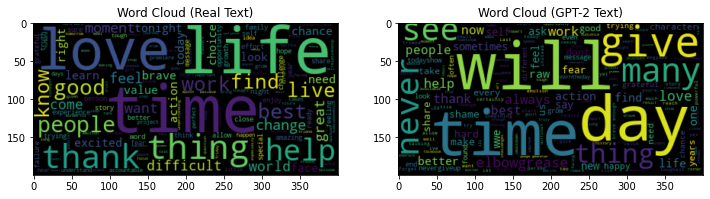

In [ ]:
# obtain the text corpus of John Cena

df_cena= df[df['Username']=="John Cena"]
corpus_cena = corpus(df_cena['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_cena_gpt = WordCloud().generate(gpt_text_generation["John Cena"])
wordcloud_cena_real = WordCloud().generate(corpus_cena)

ax.imshow(wordcloud_cena_real, interpolation='bilinear')
ax2.imshow(wordcloud_cena_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Kevin Durant

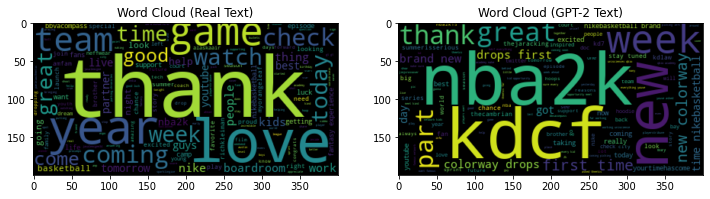

In [ ]:
# obtain the text corpus of Kevin Durant

df_durant = df[df['Username']=="Kevin Durant"]
corpus_durant = corpus(df_durant['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_durant_gpt = WordCloud().generate(gpt_text_generation["Kevin Durant"])
wordcloud_durant_real = WordCloud().generate(corpus_durant)

ax.imshow(wordcloud_durant_real, interpolation='bilinear')
ax2.imshow(wordcloud_durant_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Kevin Hart

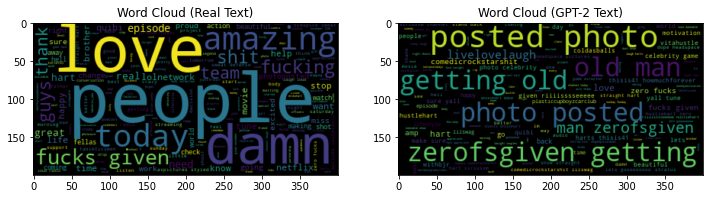

In [ ]:
# obtain the text corpus of Kevin Hart

df_hart = df[df['Username']=="Kevin Hart"]
corpus_hart = corpus(df_hart['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_hart_gpt = WordCloud().generate(gpt_text_generation["Kevin Hart"])
wordcloud_hart_real = WordCloud().generate(corpus_hart)

ax.imshow(wordcloud_hart_real, interpolation='bilinear')
ax2.imshow(wordcloud_hart_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Kylie Jenner

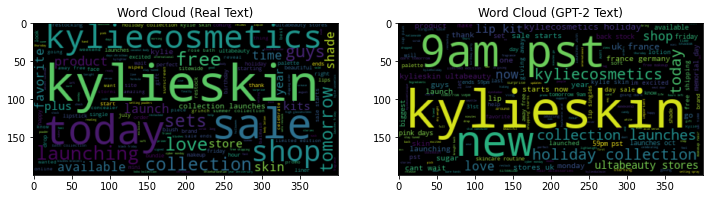

In [ ]:
# obtain the text corpus of Kylie Jenner

df_jenner = df[df['Username']=="Kylie Jenner"]
corpus_jenner = corpus(df_jenner['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_jenner_gpt = WordCloud().generate(gpt_text_generation["Kylie Jenner"])
wordcloud_jenner_real = WordCloud().generate(corpus_jenner)

ax.imshow(wordcloud_jenner_real, interpolation='bilinear')
ax2.imshow(wordcloud_jenner_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Lady Gaga

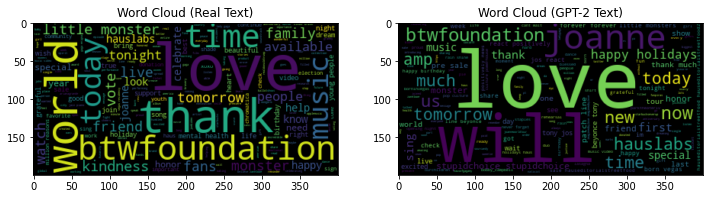

In [ ]:
# obtain the text corpus of Lady Gaga

df_gaga = df[df['Username']=="Lady Gaga"]
corpus_gaga = corpus(df_gaga['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_gaga_gpt = WordCloud().generate(gpt_text_generation["Lady Gaga"])
wordcloud_gaga_real = WordCloud().generate(corpus_gaga)

ax.imshow(wordcloud_gaga_real, interpolation='bilinear')
ax2.imshow(wordcloud_gaga_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### LeBron James

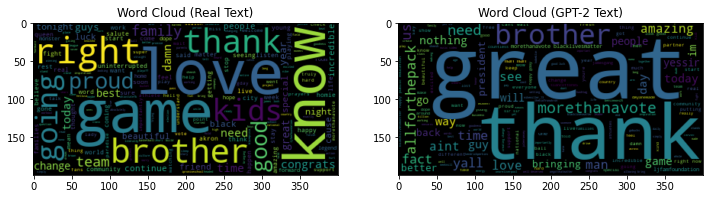

In [ ]:
# obtain the text corpus of Lebron James

df_james = df[df['Username']=="LeBron James"]
corpus_james = corpus(df_james['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_james_gpt = WordCloud().generate(gpt_text_generation["LeBron James"])
wordcloud_james_real = WordCloud().generate(corpus_james)

ax.imshow(wordcloud_james_real, interpolation='bilinear')
ax2.imshow(wordcloud_james_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Louis Tomlinson

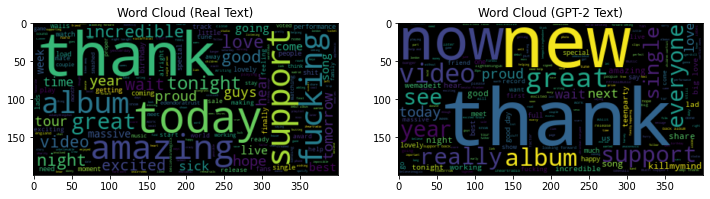

In [ ]:
# obtain the text corpus of Louis Tomlinson

df_tomlinson = df[df['Username']=="Louis Tomlinson"]
corpus_tomlinson = corpus(df_tomlinson['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_tomlinson_gpt = WordCloud().generate(gpt_text_generation["Louis Tomlinson"])
wordcloud_tomlinson_real = WordCloud().generate(corpus_tomlinson)

ax.imshow(wordcloud_tomlinson_real, interpolation='bilinear')
ax2.imshow(wordcloud_tomlinson_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Mariah Carey

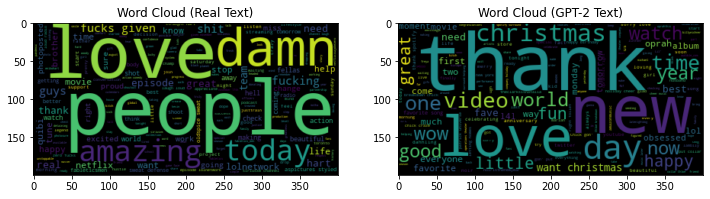

In [ ]:
# obtain the text corpus of Mariah Carey

df_carey = df[df['Username']=="Mariah Carey"]
corpus_carey = corpus(df_carey['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_carey_gpt = WordCloud().generate(gpt_text_generation["Mariah Carey"])
wordcloud_carey_real = WordCloud().generate(corpus_hart)

ax.imshow(wordcloud_carey_real, interpolation='bilinear')
ax2.imshow(wordcloud_carey_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Neil Patrick Harris

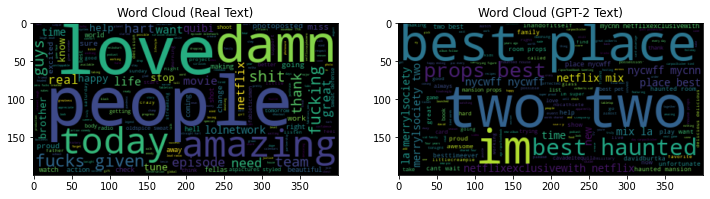

In [ ]:
# obtain the text corpus of Neil Patrick Harris

df_harris = df[df['Username']=="Neil Patrick Harris"]
corpus_harris = corpus(df_harris['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_harris_gpt = WordCloud().generate(gpt_text_generation["Neil Patrick Harris"])
wordcloud_harris_real = WordCloud().generate(corpus_hart)

ax.imshow(wordcloud_harris_real, interpolation='bilinear')
ax2.imshow(wordcloud_harris_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Oprah Winfrey

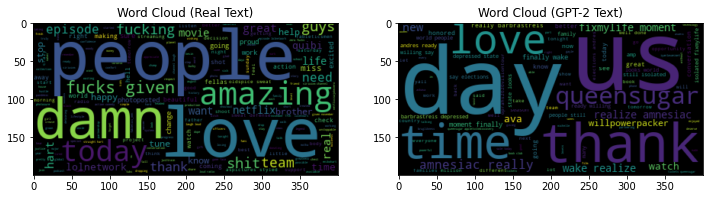

In [ ]:
# obtain the text corpus of Oprah Winfrey

df_winfrey = df[df['Username']=="Oprah Winfrey"]
corpus_winfrey = corpus(df_winfrey['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_winfrey_gpt = WordCloud().generate(gpt_text_generation["Oprah Winfrey"])
wordcloud_winfrey_real = WordCloud().generate(corpus_hart)

ax.imshow(wordcloud_winfrey_real, interpolation='bilinear')
ax2.imshow(wordcloud_winfrey_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Pope Francis

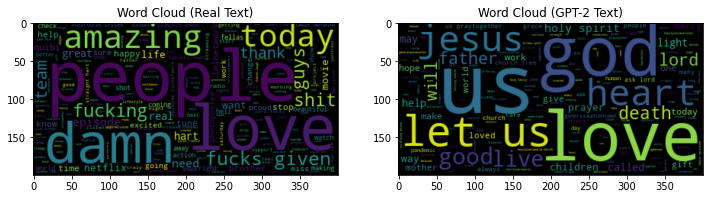

In [ ]:
# obtain the text corpus of Pope Francis

df_francis = df[df['Username']=="Pope Francis"]
corpus_francis = corpus(df_hart['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_francis_gpt = WordCloud().generate(gpt_text_generation["Pope Francis"])
wordcloud_francis_real = WordCloud().generate(corpus_francis)

ax.imshow(wordcloud_francis_real, interpolation='bilinear')
ax2.imshow(wordcloud_francis_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Ronda Rousey

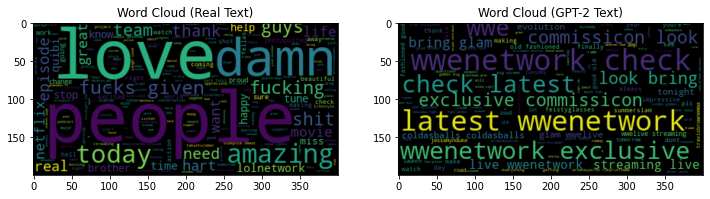

In [ ]:
# obtain the text corpus of Ronda Rousey

df_rousey = df[df['Username']=="Ronda Rousey"]
corpus_rousey = corpus(df_rousey['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_rousey_gpt = WordCloud().generate(gpt_text_generation["Ronda Rousey"])
wordcloud_rousey_real = WordCloud().generate(corpus_hart)

ax.imshow(wordcloud_rousey_real, interpolation='bilinear')
ax2.imshow(wordcloud_rousey_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Tim Cook

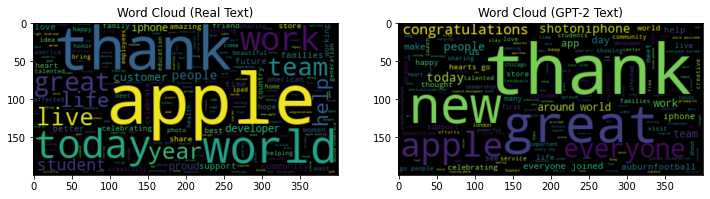

In [ ]:
# obtain the text corpus of Tim Cook
df_cook = df[df['Username']=="Tim Cook"]
corpus_cook = corpus(df_cook['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_cook_gpt = WordCloud().generate(gpt_text_generation["Tim Cook"])
wordcloud_cook_real = WordCloud().generate(corpus_cook)

ax.imshow(wordcloud_cook_real, interpolation='bilinear')
ax2.imshow(wordcloud_cook_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### Wiz Khalifa

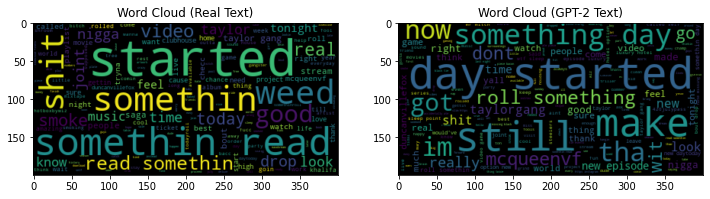

In [ ]:
# obtain the text corpus of Wiz Khalifa

df_khalifa = df[df['Username']=="Wiz Khalifa"]
corpus_khalifa = corpus(df_khalifa['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_khalifa_gpt = WordCloud().generate(gpt_text_generation["Wiz Khalifa"])
wordcloud_khalifa_real = WordCloud().generate(corpus_khalifa)

ax.imshow(wordcloud_khalifa_real, interpolation='bilinear')
ax2.imshow(wordcloud_khalifa_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

### daniel tosh

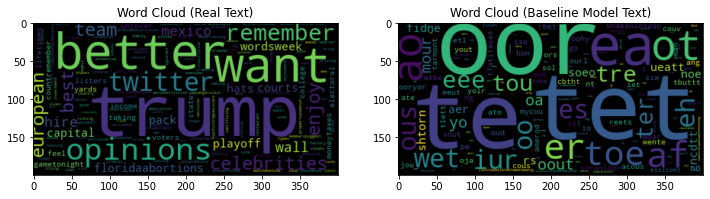

In [ ]:
# obtain the text corpus of daniel tosh

df_tosh = df[df['Username']=="daniel tosh"]
corpus_tosh = corpus(df_tosh['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_tosh_gpt = WordCloud().generate(baseline_text_generation["daniel tosh"])
wordcloud_tosh_real = WordCloud().generate(corpus_tosh)

ax.imshow(wordcloud_tosh_real, interpolation='bilinear')
ax2.imshow(wordcloud_tosh_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (Baseline Model Text)')

plt.show()

### jimmy fallon

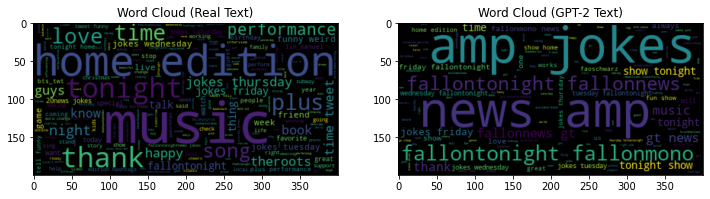

In [ ]:
# jimmy fallon
df_fallon = df[df['Username']=="jimmy fallon"]
corpus_fallon = corpus(df_fallon['Text (EPA)'])

# plot the word clouds of the original and generated text
plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

wordcloud_fallon_gpt = WordCloud().generate(gpt_text_generation["jimmy fallon"])
wordcloud_fallon_real = WordCloud().generate(corpus_fallon)

ax.imshow(wordcloud_fallon_real, interpolation='bilinear')
ax2.imshow(wordcloud_fallon_gpt, interpolation='bilinear')

ax.title.set_text('Word Cloud (Real Text)')
ax2.title.set_text('Word Cloud (GPT-2 Text)')

plt.show()

## Sentiment Analysis

In [ ]:
# obtain the sentiment score of a given text
def polarity(text):
    sentiment = TextBlob(text).sentiment[0]
    return sentiment

# obtain the subjectivity score of a given text
def subjectivity(text):
    sentiment = TextBlob(text).sentiment[1]
    return sentiment


## Analyzing Generated Text 

In [ ]:
# obtain the average sentence length of a given text
def sentence_length(text):
  text_nlp = nlp(text)

  num_words = len(list(text_nlp))
  num_sents = len(list(text_nlp.sents))

  return num_words/num_sents
  

In [ ]:
# create a new data frame storing the data of original tweets
df_EPA = pd.DataFrame()
df_EPA['Name'] = df['Username']
df_EPA['Occupation'] = df['Occupation']
df_EPA['Text (Model)'] = df['Text (Model)']

# Find the average sentence length of each text and add it to the dataframe
df_EPA['Average Sentence Length'] = df['Text (Model)'].apply(lambda x: sentence_length(x))

# Find the sentiment score of each text and add it to the dataframe
df_EPA['Sentiment Score'] = df['Text (Model)'].apply(lambda x: polarity(x))

# Find the subjectivity score of each text and add it to the dataframe
df_EPA['Subjectivity'] = df['Text (Model)'].apply(lambda x: subjectivity(x))

df_EPA['Retweets'] = df['Retweet count']
df_EPA['Likes'] = df['Like count']

# Find the number of tweets in the study and add it to the dataframe
df_EPA['Number of Tweets in Analysis'] = df_EPA['Name'].apply(lambda x: num_observations(x))

# Find the total number of tweets and add it to the dataframe
df_EPA['Total Number of Tweets'] = df_EPA['Name'].apply(lambda x: total_num_tweets(x))

In [ ]:
# create a list of names
name_generated = []

# create a list of generated text
text_generated = []
df_GPT = pd.DataFrame()

# append list with names and corresponding generated text
for key, value in gpt_text_generation.items():
  text = nlp(value)
  for sent in text.sents:
    name_generated.append(key)
    text_generated.append(str("".join(list(str(sent)))))



In [ ]:
# return occupation of a given celebrity
def occupation(name):
  occupations = {'Leader' : ['Barack Obama', 'Joe Biden', 'Elizabeth Warren', 'Pope Francis', 'Donald Trump'],
             
            'Athlete' : ['LeBron James', 'John Cena', 'Kevin Durant', 'Ronda Rousey', 'Anthony Joshua'],
             
            'Entertainer' : ['Kevin Hart', 'Emma Watson', 'Neil Patrick Harris',
                 'Harry Styles.', 'Dwayne Johnson', 'daniel tosh'],
             
            'TV Personality' : ['Ellen DeGeneres', 'jimmy fallon','Oprah Winfrey', "Conan O'Brien",
              'Gordon Ramsay'],
             
            'Entrepreneur' : ['Jeff Weiner', 'Bill Gates', 'Elon Musk', 'Kylie Jenner', 'Tim Cook'],
             
            'Artist' : ['Lady Gaga', 'Wiz Khalifa', 'Louis Tomlinson',
          'Alicia Keys', 'Mariah Carey']}

  for occupation in occupations.keys():
    if name in occupations[occupation]:
      return occupation


In [ ]:
# create a new data frame storing the data of generated tweets

df_GPT = pd.DataFrame()
df_GPT['Name'] = name_generated
df_GPT['Occupation'] = df_GPT['Name'].apply(lambda x: occupation(x))
df_GPT['Generated Text'] = text_generated

# Find the average sentence length of each text and add it to the dataframe
df_GPT['Average Sentence Length'] = df_GPT['Generated Text'].apply(lambda x: sentence_length(x))

# Keep text that is greater than 3 words
df_GPT = df_GPT[df_GPT['Average Sentence Length']>3]

# Find the sentiment score of each text and add it to the dataframe
df_GPT['Sentiment Score'] = df_GPT['Generated Text'].apply(lambda x: polarity(x))

# Find the subjectivity score of each text and add it to the dataframe
df_GPT['Subjectivity'] = df_GPT['Generated Text'].apply(lambda x: subjectivity(x))



In [ ]:
# assign Conan O'Brien the 'TV Personality' occupation
for ind, row in df_GPT.iterrows():
  if row['Name']=="Conan O'Brien":
    row['Occupation'] = 'TV Personality'
    

# Confidence interval of Sentence Length

In [ ]:
# create data frame storing information on confidence intervals for the original and generated text
sentence_length_overlap = pd.DataFrame()
ci1_list = []
ci2_list = []
overlap = []


names = sorted(list(set(df_EPA['Name'])))
p_values = []

# return the confidence intervals of the sentence length of the original and the generated tweets
def confidence_intervals(name):
  df1 = df_EPA[df_EPA['Name']==name]
  df2 = df_GPT[df_GPT['Name']==name]

  sample1 = list(df1['Average Sentence Length'])
  sample2 = list(df2['Average Sentence Length'])

  ci1 = st.t.interval(alpha=0.99, df=len(sample1)-1, loc=np.mean(sample1), scale=st.sem(sample1))
  ci2 = st.t.interval(alpha=0.99, df=len(sample2)-1, loc=np.mean(sample2), scale=st.sem(sample2))

  return ci1, ci2



In [ ]:
# find the confidence intervals of the sentence lengths for each name and add it to the dataframe
for name in names:
  ci1, ci2 = confidence_intervals(name)
  ci1_list.append(ci1)
  ci2_list.append(ci2)

  # adds True if the confidence intervals overlap and False if it doesn't
  overlap.append(ci1[0] <= ci2[0] <= ci1[1] or ci2[0] <= ci1[0] <= ci2[1])

# assign derived values to the data frame
sentence_length_overlap['Name'] = names
sentence_length_overlap['CI For Original Text'] = ci1_list
sentence_length_overlap['CI For Generated Text'] = ci2_list
sentence_length_overlap['Not Statistically Different?'] = overlap
sentence_length_overlap.index = sentence_length_overlap['Name']

sentence_length_overlap

Name  ... Not Statistically Different?
Name                                      ...                             
Alicia Keys                  Alicia Keys  ...                         True
Anthony Joshua            Anthony Joshua  ...                        False
Barack Obama                Barack Obama  ...                         True
Bill Gates                    Bill Gates  ...                         True
Conan O'Brien              Conan O'Brien  ...                         True
Donald Trump                Donald Trump  ...                         True
Dwayne Johnson            Dwayne Johnson  ...                         True
Elizabeth Warren        Elizabeth Warren  ...                         True
Ellen DeGeneres          Ellen DeGeneres  ...                         True
Elon Musk                      Elon Musk  ...                        False
Emma Watson                  Emma Watson  ...                         True
Gordon Ramsay              Gordon Ramsay  ...                        False
Harry Styles.              Harry Styles.  ...                        False
Jeff Weiner                  Jeff Weiner  ...                        False
Joe Biden                      Joe Biden  ...                         True
John Cena                      John Cena  ...                         True
Kevin Durant                Kevin Durant  ...                        False
Kevin Hart                    Kevin Hart  ...                        False
Kylie Jenner                Kylie Jenner  ...                        False
Lady Gaga                      Lady Gaga  ...                         True
LeBron James                LeBron James  ...                        False
Louis Tomlinson          Louis Tomlinson  ...                        False
Mariah Carey                Mariah Carey  ...                         True
Neil Patrick Harris  Neil Patrick Harris  ...                         True
Oprah Winfrey              Oprah Winfrey  ...                        False
Pope Francis                Pope Francis  ...                         True
Ronda Rousey                Ronda Rousey  ...                        False
Tim Cook                        Tim Cook  ...                         True
Wiz Khalifa                  Wiz Khalifa  ...                        False
daniel tosh                  daniel tosh  ...                        False
jimmy fallon                jimmy fallon  ...                        False

[31 rows x 4 columns]

In [ ]:
# Find the average sentiment score for each name for the orignal and generted text
sentiment_EPA = df_EPA.groupby(by='Name')['Sentiment Score'].mean()
sentiment_GPT = df_GPT.groupby(by='Name')['Sentiment Score'].mean()
sentiment_GPT_tosh = pd.Series([float('NAN')], index=['daniel tosh'])
sentiment_GPT = pd.concat([sentiment_GPT, sentiment_GPT_tosh])

# Find the average subjectivity score for each name for the orignal and generted text
subjectivity_EPA = df_EPA.groupby(by='Name')['Subjectivity'].mean()
subjectivity_GPT = df_GPT.groupby(by='Name')['Subjectivity'].mean()
subjectivity_GPT_tosh = pd.Series([float('NAN')], index=['daniel tosh'])
subjectivity_GPT = pd.concat([subjectivity_GPT, subjectivity_GPT_tosh])

# add the derived average scores to the dataframe
sentence_length_overlap['Sentiment Score (Original)'] = sentiment_EPA.values
sentence_length_overlap['Sentiment Score (Generated)'] = sentiment_GPT.values
sentence_length_overlap['Subjectivity (Original)'] = subjectivity_EPA.values
sentence_length_overlap['Subjectivity (Generated)'] = subjectivity_GPT.values

# find the difference in scores between the real and generated text
sentence_length_overlap['Sentiment Score Error'] = sentence_length_overlap['Sentiment Score (Original)'] - sentence_length_overlap['Sentiment Score (Generated)']
sentence_length_overlap['Subjectivity Score Error'] = sentence_length_overlap['Subjectivity (Original)'] - sentence_length_overlap['Subjectivity (Generated)']

# return True if the difference in score is less than 0.05, False if it doesnt
def proximity(score):
  if np.abs(score) <0.05:
    return True
  return False

# add the derived values to the dataset
sentence_length_overlap['Good Sentiment Score Estimate?'] = sentence_length_overlap['Sentiment Score Error'].apply(lambda x: proximity(x))
sentence_length_overlap['Good Subjectivity Score Estimate?'] = sentence_length_overlap['Subjectivity Score Error'].apply(lambda x: proximity(x))


sentence_length_overlap

Name  ... Good Subjectivity Score Estimate?
Name                                      ...                                  
Alicia Keys                  Alicia Keys  ...                              True
Anthony Joshua            Anthony Joshua  ...                              True
Barack Obama                Barack Obama  ...                              True
Bill Gates                    Bill Gates  ...                             False
Conan O'Brien              Conan O'Brien  ...                              True
Donald Trump                Donald Trump  ...                              True
Dwayne Johnson            Dwayne Johnson  ...                              True
Elizabeth Warren        Elizabeth Warren  ...                             False
Ellen DeGeneres          Ellen DeGeneres  ...                             False
Elon Musk                      Elon Musk  ...                              True
Emma Watson                  Emma Watson  ...                             False
Gordon Ramsay              Gordon Ramsay  ...                             False
Harry Styles.              Harry Styles.  ...                             False
Jeff Weiner                  Jeff Weiner  ...                             False
Joe Biden                      Joe Biden  ...                             False
John Cena                      John Cena  ...                             False
Kevin Durant                Kevin Durant  ...                              True
Kevin Hart                    Kevin Hart  ...                             False
Kylie Jenner                Kylie Jenner  ...                             False
Lady Gaga                      Lady Gaga  ...                             False
LeBron James                LeBron James  ...                             False
Louis Tomlinson          Louis Tomlinson  ...                             False
Mariah Carey                Mariah Carey  ...                             False
Neil Patrick Harris  Neil Patrick Harris  ...                             False
Oprah Winfrey              Oprah Winfrey  ...                             False
Pope Francis                Pope Francis  ...                             False
Ronda Rousey                Ronda Rousey  ...                              True
Tim Cook                        Tim Cook  ...                             False
Wiz Khalifa                  Wiz Khalifa  ...                              True
daniel tosh                  daniel tosh  ...                             False
jimmy fallon                jimmy fallon  ...                             False

[31 rows x 12 columns]

In [ ]:
# remove texts that exceed 140 characters as per required for tweets
df_GPT = df_GPT[df_GPT['Generated Text'].apply(lambda x: len(x)<=140)]


# Export Data Frames as .xlsx Files

In [ ]:
# Export data frame of GPT generated text
with pd.ExcelWriter('GPT_results.xlsx') as writer:
  df_GPT.to_excel(writer, sheet_name='GPT')
writer.save()

In [ ]:
# Export data frame of original text
with pd.ExcelWriter('Dataset_EPA.xlsx') as writer:
  df_EPA.to_excel(writer, sheet_name='EPA')
writer.save()

In [ ]:
# Export the summary of the results
with pd.ExcelWriter('Results_Summary.xlsx') as writer:
  sentence_length_overlap.to_excel(writer, sheet_name='EPA')
writer.save()